In [33]:
#import the packages
import math
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt
from scipy.stats import linregress
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model

In [34]:
os.getcwd()

'/Users/bbrs.0/Desktop/modelingbitcoindatapoints'

In [23]:
#read csv (2012'den 2021'e dataset)
df=pd.read_csv("bitcoin.csv", index_col=None)

In [24]:
#NaN bulunan satırları drop
df=df.dropna()
#ilk 10 entry listeleme
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
1896,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2333,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
3612,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
4553,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4710,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000


In [25]:
#datasetteki değerleri değişkenlere atama
price=df['Weighted_Price']
time=df['Timestamp']
df2=DataFrame({'price':price,'time':time})

In [26]:
#price istatistik
df2.price.describe()

count    3.613769e+06
mean     6.008935e+03
std      8.995992e+03
min      3.800000e+00
25%      4.438306e+02
50%      3.596804e+03
75%      8.627637e+03
max      6.171621e+04
Name: price, dtype: float64

In [27]:
#price'ın zamanda nasıl değiştiği (ölçeklendirme)
scale=preprocessing.scale(price)

array([-0.66746901, -0.66746901, -0.66745385, ...,  5.85674966,
        5.86404932,  5.86432535])

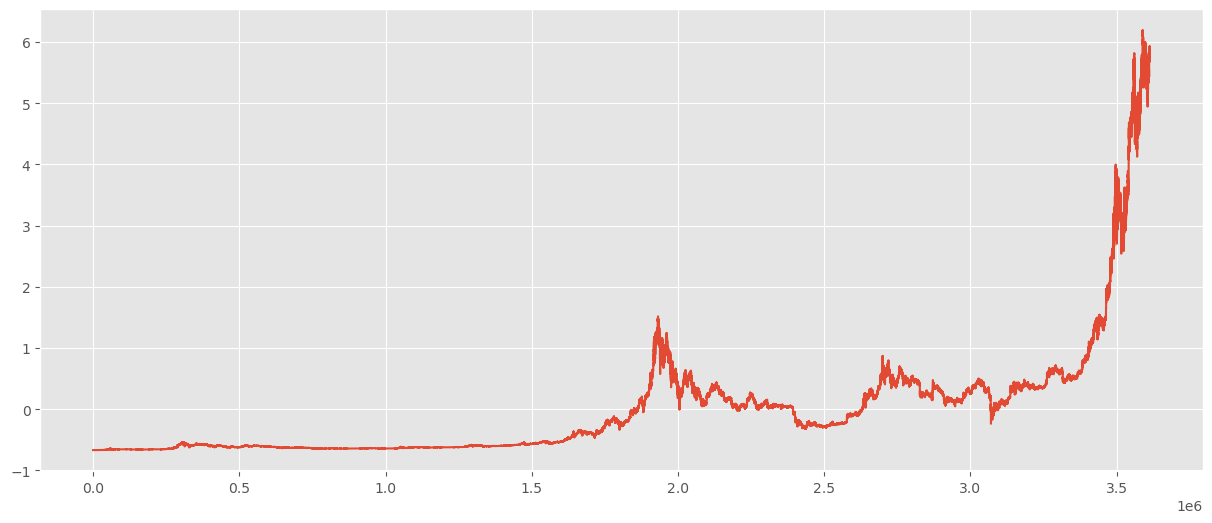

In [28]:
#grafiği çizdirme
plt.plot(scale)
scale

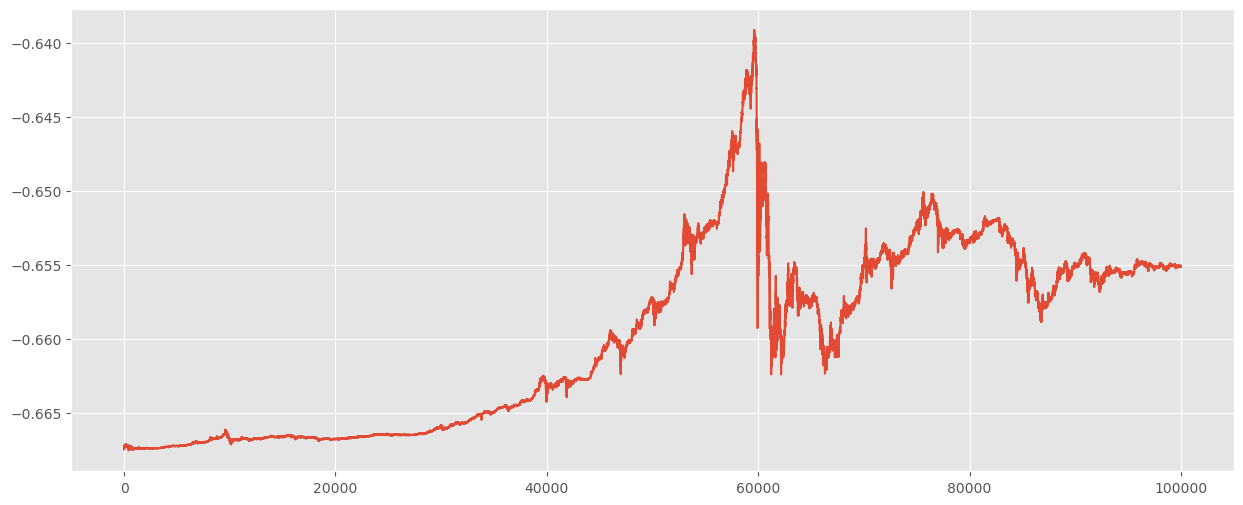

In [29]:
scale
#veri seti oluşturma
df=DataFrame(scale)
#verilerden bi kısmının örneğini alma (0-100000 aralığı)
sample=df[0:100000]
sample
#bu aralıktaki örneklerin grafiğini çizdirme
plt.plot(sample)

In [30]:
#100.000 örnek için tahmin

#örneği kullanarak güncel tahminde bulunmak için (veriyi makineye öğretme-eğitim)
X=sample.values
X
#100.000 veriden ilk 90.000 gözlemi eğitim verisi, son 10.000'i ise test verisi olarak ayarladık
train, test = X[0:-10000], X[-10000:]
train
#örnek test verilerini (tahmini) yazdırma
test

array([[-0.65508074],
       [-0.65508814],
       [-0.65508646],
       ...,
       [-0.655067  ],
       [-0.65511573],
       [-0.65511573]])

RMSE: 0.000


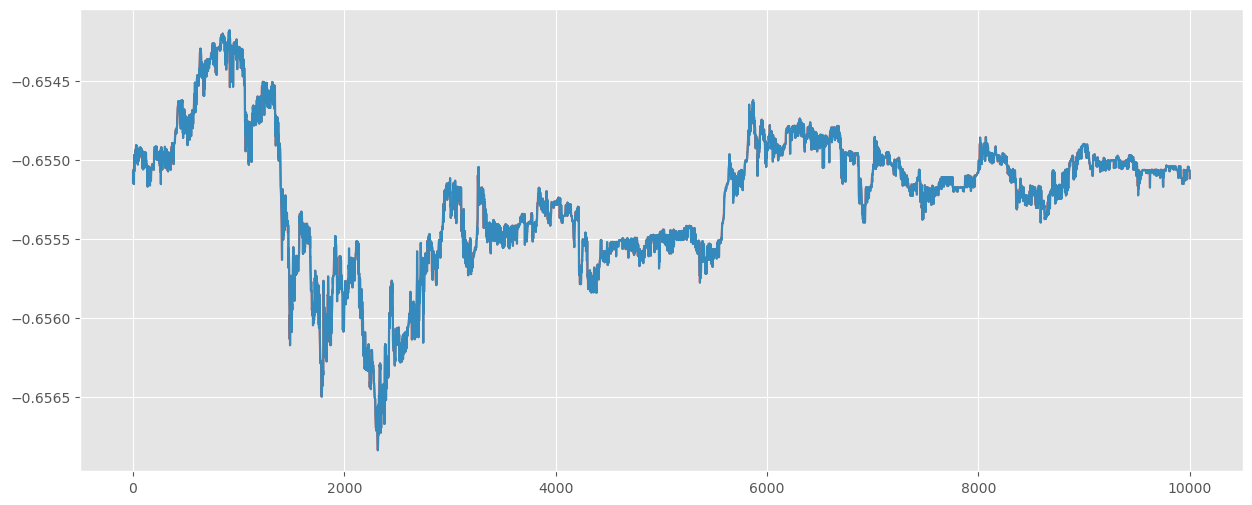

4.178304872071611e-05

In [31]:
# veri kümesi ile birlikte bir adım ileri tahminde bulunma
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 # tahmin ekleme
 predictions.append(history[-1])
 # gözlem ekleme
 history.append(test[i])
# performansı raporlama - (Root Mean-Squared Error (Ortalama Karekök Sapması))
# 0'a yakın çıkması tahminin doğruluğu anlamına gelir
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# gözlenen ve tahmin edilenin grafiğini çizdirme
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()
rmse

RMSE: 0.00004


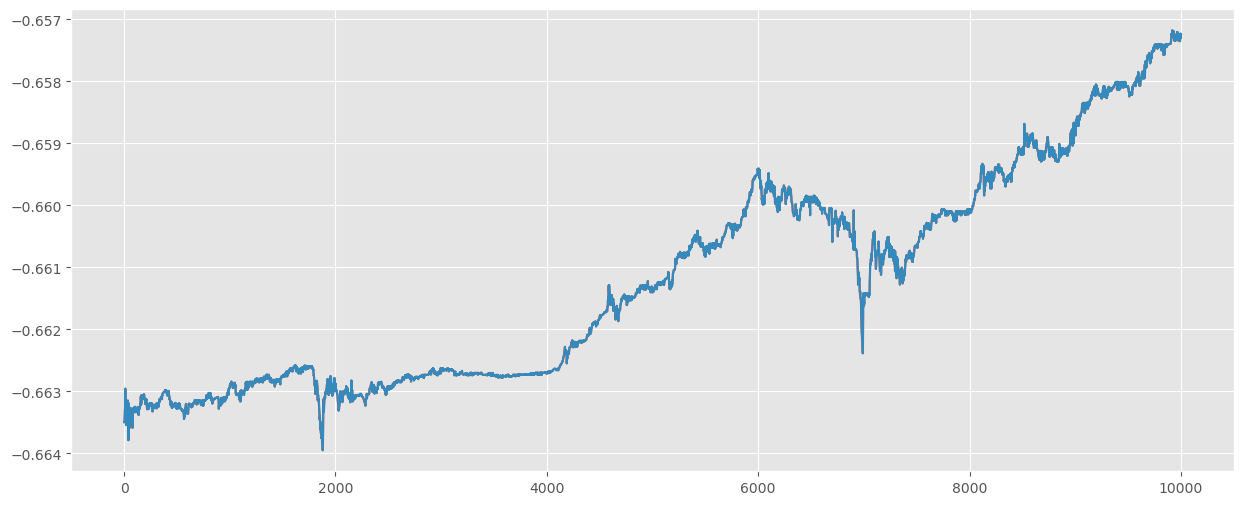

3.8955757244030314e-05

In [32]:
#50.000 örnek için ise tahmin

# aldığımız örneğin daha ufak bir örneğini alıyoruz
sample2=sample[0:50000]
X2=sample2.values
X2
# bu örneğin ise ilk 40.000'ini eğitim, son 10.000'ini test verisi olarak ayarlıyoruz
train2, test2 = X2[0:-10000], X2[-10000:]
train2
test2
# ileriye dönük doğrulama
history2 = [x for x in train2]
predictions2 = list()
for i in range(len(test2)):
 # tahmin ekleme2
 predictions2.append(history2[-1])
 # gözlem ekleme
 history2.append(test2[i])
# performansı raporlama
rmse2 = math.sqrt(mean_squared_error(test2, predictions2))
print('RMSE: %.5f' % rmse2)
# gözlenen ve tahmin edilenin grafiğini çizdirme
pyplot.plot(test2)
pyplot.plot(predictions2)
pyplot.show()
rmse2